In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('data.csv', encoding= 'ISO-8859-1', low_memory=False)

## Data Cleaning

In [11]:
# concise summary of a DataFrame
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [29]:
# dropping last three un-named columns
# df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
# Renaming column names for better understanding of the DataFrame.
df.rename(columns = {'labels' : 'target', 'features' : 'text'}, inplace = True)

In [30]:
# Concise summary of DataFrame after dropping unwanted columns and renaming labels and features columns.
df.info

<bound method DataFrame.info of      target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham              Will Ì_ b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [31]:
# Encoding target values to 0 and 1 for better understanding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [40]:
df['target'] = le.fit_transform(df['target'])

In [41]:
# returns total number of null values in the DataFrame, (here 0).
df.isnull().sum()

target    0
text      0
dtype: int64

In [45]:
# returns count of duplicate rows in the DataFrame.
df.duplicated().sum()

403

In [51]:
# dropping duplicate entries from the DataFrame.
df = df.drop_duplicates(keep = 'first')

## Exploratory data analysis (EDA)

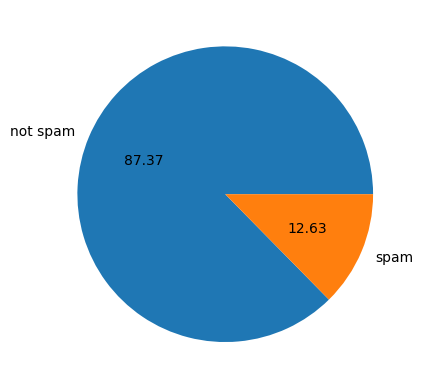

In [56]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['not spam', 'spam'], autopct = "%0.2f")
plt.show()

In [63]:
# pip install --upgrade pip

In [65]:
import nltk
# nltk.download('punkt')

In [70]:
# adding relevant columns like number of characters, words, and sentences for each text message.
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Hp\AppData\Local\Temp\ipykernel_6432\1840599064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)
C:\Users\Hp\AppData\Local\Temp\ipykernel_6432\1840599064.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\Hp\AppData\Local\Temp\ipykernel_6432\1840599064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [74]:
# analysing not spam texts
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
# analysing spam texts
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [79]:
# %pip install seaborn
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

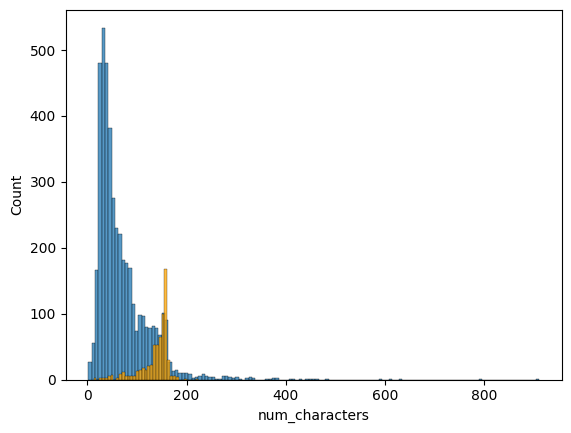

In [98]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'orange')

<Axes: xlabel='num_words', ylabel='Count'>

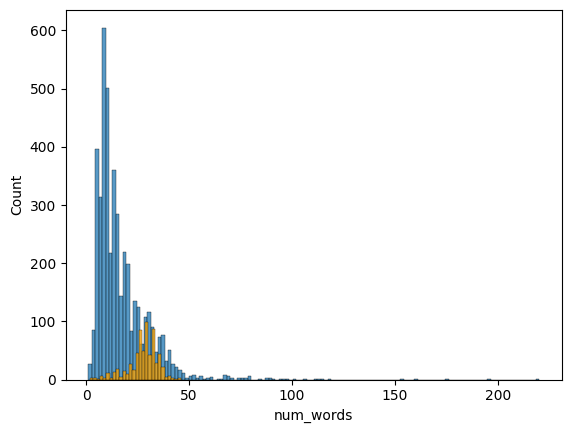

In [97]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'orange')

<Axes: xlabel='num_sentences', ylabel='Count'>

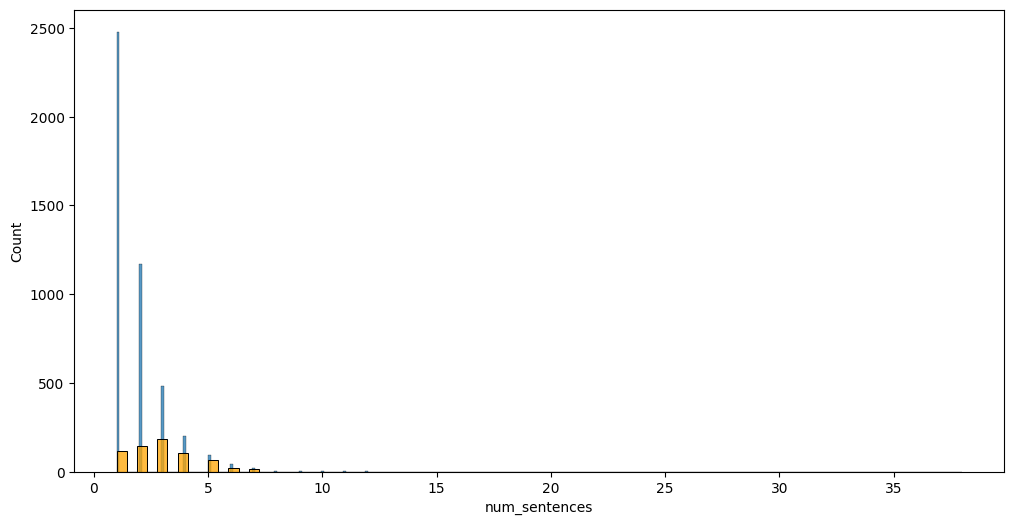

In [108]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'orange')

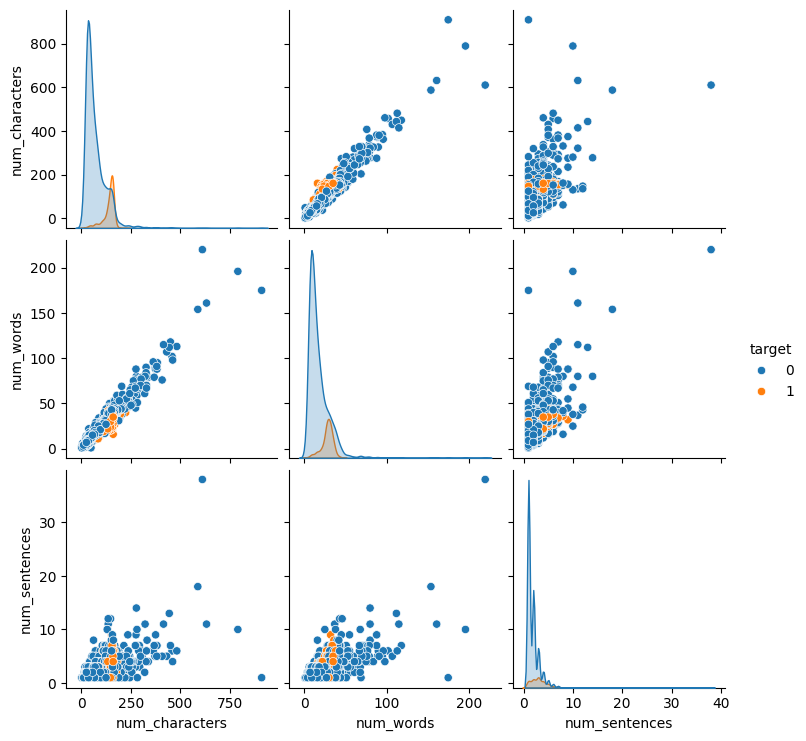

In [107]:
sns.pairplot(df, hue = 'target')

<Axes: >

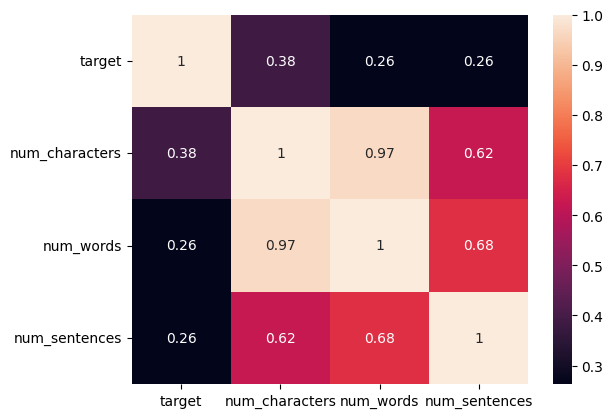

In [137]:
# heatmap for correlation between the features
sns.heatmap(df[['target', 'num_characters','num_words', 'num_sentences']].corr(), annot = True)

## Data Preprocessing

In [160]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

In [169]:
def transform_text(text):
    lower_case_text = text.lower()
    tokenized_text = nltk.word_tokenize(lower_case_text)
    
    text_without_sp_char = []
    for text in tokenized_text:
        if text.isalnum():
            text_without_sp_char.append(text)
    
    text_without_stopwords_punctuation = []
    for text in text_without_sp_char:
        if text not in stopwords.words('english') and text not in string.punctuation:
            text_without_stopwords_punctuation.append(text)

    text_after_stemming = []
    for text in text_without_stopwords_punctuation:
        text_after_stemming.append(stemmer.stem(text))
    
    return " ".join(text_after_stemming)

In [172]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6432\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [185]:
# pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

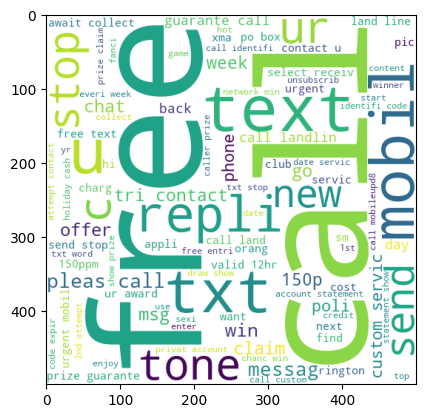

In [186]:
# generating WordClouds for spam texts
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.imshow(spam_wc)

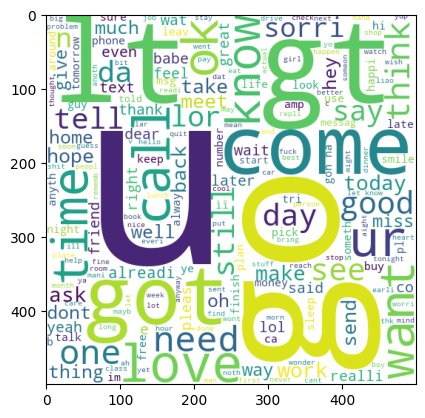

In [187]:
# generating WordClouds for not spam texts
not_spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.imshow(not_spam_wc)

In [191]:
spam_corpus = []
for text in df[df['target'] == 1]['transformed_text'].tolist():
    for word in text.split():
        spam_corpus.append(word)

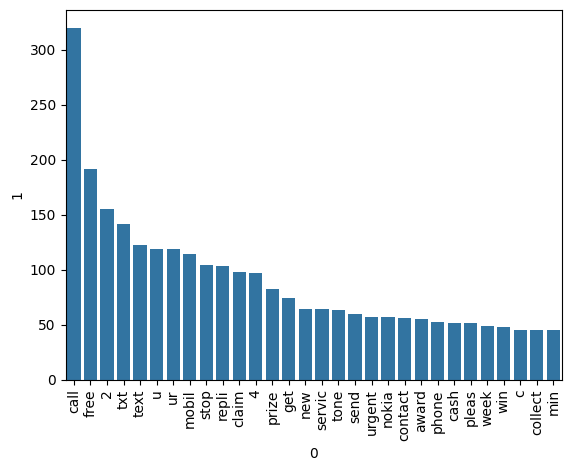

In [213]:
# returning most common 30 words in a spam text
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [215]:
not_spam_corpus = []
for text in df[df['target'] == 0]['transformed_text'].tolist():
    for word in text.split():
        not_spam_corpus.append(word)

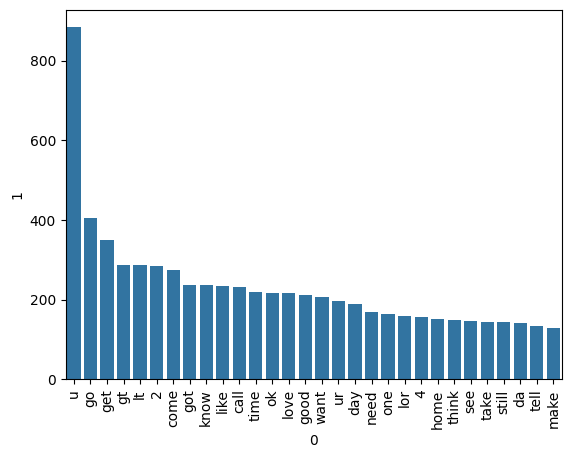

In [216]:
# returning most common 30 words in a not spam text
sns.barplot(x = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [249]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [250]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [253]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [254]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [255]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [256]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [257]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


## Creating a Pipeline 

In [258]:
import pickle

In [260]:
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))